# 준비

In [1]:
# 필요 library import 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 패키지 임포트
import os
import warnings

# FutureWarning 제거
warnings.simplefilter(action='ignore', category = FutureWarning)

# os 에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else :
    font_family = "Apple Gothic"
    

# -값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

In [4]:
data = pd.read_csv('total_dataset.csv', encoding='euc-kr', index_col=['EMD_NM'])

# 데이터 확인

In [5]:
data

,TRAD,CONCERT,OLD,MART,LIB,ART,MUS,MED,COMM,SPORT,OWN,JOB,CARROT,CHARGE
EMD_NM,,,,,,,,,,,,,,
연제동,0,0,0,0,3,0,0,0,0,3,0,0,2,0
운암동,1,2,1,0,13,1,0,13,3,3,6,135,3,3
덕림동,0,0,1,0,0,0,0,0,0,1,0,0,0,1
삼거동,0,0,3,0,0,0,0,3,0,1,0,0,0,0
북구_동림동,0,0,1,0,6,0,0,3,1,6,6,27,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
쌍촌동,0,3,1,0,14,0,0,8,2,10,41,256,3,5
내방동,0,0,0,0,1,0,0,0,0,1,0,0,0,1
덕흥동,0,0,1,0,0,0,0,0,0,5,0,0,0,0


In [7]:
data.head()

,ORG_NUM,TRAD,CONCERT,OLD,MART,LIB,ART,MUS,MED,COMM,SPORT,CHARGE
0,1430,0,0,0,0,3,0,0,0,0,3,0
1,1431,1,2,1,0,13,1,0,13,3,3,3
2,1556,0,0,1,0,0,0,0,0,0,1,1
3,1560,0,0,3,0,0,0,0,3,0,1,0
4,1429,0,0,1,0,6,0,0,3,1,6,3


In [5]:
data.describe()

,TRAD,CONCERT,OLD,MART,LIB,ART,MUS,MED,COMM,SPORT,OWN,JOB,CARROT,CHARGE
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.119171,0.113990,0.492228,0.113990,1.818653,0.088083,0.041451,1.378238,0.502591,2.865285,3.497409,30.896373,0.383420,0.575130
std,0.434568,0.417659,0.823605,0.429948,3.367007,0.405063,0.199849,2.581372,0.791388,4.089174,11.208314,74.808990,0.900309,1.097252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,2.000000,1.000000,3.000000,2.000000,26.000000,0.000000,1.000000
max,3.000000,3.000000,4.000000,3.000000,16.000000,4.000000,1.000000,18.000000,4.000000,20.000000,102.000000,553.000000,5.000000,5.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 연제동 to 충장동
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   TRAD     193 non-null    int64
 1   CONCERT  193 non-null    int64
 2   OLD      193 non-null    int64
 3   MART     193 non-null    int64
 4   LIB      193 non-null    int64
 5   ART      193 non-null    int64
 6   MUS      193 non-null    int64
 7   MED      193 non-null    int64
 8   COMM     193 non-null    int64
 9   SPORT    193 non-null    int64
 10  OWN      193 non-null    int64
 11  JOB      193 non-null    int64
 12  CARROT   193 non-null    int64
 13  CHARGE   193 non-null    int64
dtypes: int64(14)
memory usage: 22.6+ KB


In [199]:
data.isnull()

,TRAD,CONCERT,OLD,MART,ART,MUS,MED,SPORT,OWN,JOB,CARROT,CHARGE
EMD_NM,,,,,,,,,,,,
연제동,False,False,False,False,False,False,False,False,False,False,False,False
운암동,False,False,False,False,False,False,False,False,False,False,False,False
덕림동,False,False,False,False,False,False,False,False,False,False,False,False
삼거동,False,False,False,False,False,False,False,False,False,False,False,False
북구_동림동,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
쌍촌동,False,False,False,False,False,False,False,False,False,False,False,False
내방동,False,False,False,False,False,False,False,False,False,False,False,False
덕흥동,False,False,False,False,False,False,False,False,False,False,False,False


In [200]:
data.isnull().sum()

TRAD       0
CONCERT    0
OLD        0
MART       0
ART        0
MUS        0
MED        0
SPORT      0
OWN        0
JOB        0
CARROT     0
CHARGE     0
dtype: int64

# 독립변수, 종속변수 선언

In [248]:
# 독립변수 ( data )
X = data.iloc[:, :-1]

In [249]:
# 종속변수 ( target )
y = data.iloc[:,-1]

In [250]:
print(f'X row : {X.shape[0]}개')
print(f'y row : {y.shape[0]}개')

X row : 193개
y row : 193개


In [ ]:
# 상관계수 그래프
sns.pairplot(data.corr())

## train, test split

In [251]:
# 훈련, 테스트 데이터 분리 - 원본 데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

## VIF 높은 컬럼 제거하고 선언 ( 때에 따라 바꿔가며 진행 )

In [258]:
data = data.drop(['MED'], axis=1)

In [259]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [260]:
# 훈련, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

# 표준화
## Strandard Scaler

In [448]:
# Standard Scaler  ( 표준화 )
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_data = std.fit_transform(data.iloc[:, :])

In [449]:
# 표준화된 행렬 -> 데이터프레임 변환 
scaled_df = pd.DataFrame(std_data, columns=[data.columns])

In [450]:
# 독립변수 ( data )
X = scaled_df.iloc[:,:10]

In [451]:
# 종속변수 ( target )
y = scaled_df.iloc[:,-1]

In [452]:
# 흔련, 테스트 데이터 분리 - Scaled Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=369, stratify=y)

## Min-Max Scaler

In [428]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [429]:
# 표준화된 행렬 -> 데이터프레임 변환 
scaled_df = pd.DataFrame(scaled_data, columns=[data.columns])

In [430]:
# 독립변수 ( data )
X = scaled_df.iloc[:,:-1]

In [431]:
# 종속변수 ( target )
y = scaled_df.iloc[:,-1]

In [432]:
# 흔련, 테스트 데이터 분리 - Scaled Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=369, stratify=y)

# 다중공선성 확인

In [252]:
from statsmodels import api
ols = api.OLS(y, X)
result = ols.fit()

In [253]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 CHARGE   R-squared (uncentered):                   0.747
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              48.91
Date:                Thu, 11 Aug 2022   Prob (F-statistic):                    1.75e-48
Time:                        14:49:40   Log-Likelihood:                         -182.09
No. Observations:                 193   AIC:                                      386.2
Df Residuals:                     182   BIC:                                      422.1
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## VIF ( Variance Inflation Factors ) 확인

In [254]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [255]:
def feature_engineering_XbyVIF(X):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X.values, i)
                         for i in range(X.shape[1])]
    vif['Feature'] = X.columns
    return vif

In [256]:
vif = feature_engineering_XbyVIF(X)

In [257]:
print(vif)

    VIF_Factor  Feature
0     1.647380     TRAD
1     1.679593  CONCERT
2     1.673572      OLD
3     1.544639     MART
4     1.125528      ART
5     1.222836      MUS
6     3.047415      MED
7     1.601606    SPORT
8     1.980331      OWN
9     1.738863      JOB
10    1.931885   CARROT


- VIF 가 4이상인 경우, 다중공선성이 존재한다고 판단, 변수 제거

# 모델 학습
## Multi-regression

In [261]:
model = LinearRegression()

In [262]:
model.fit(X_train, y_train)

LinearRegression()

In [263]:
print(f'훈련 세트의 정확도 : {model.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {model.score(X_test, y_test)}')
print(f'사용한 특성의 수 : {np.sum(model.coef_ != 0)}')

훈련 세트의 정확도 : 0.6127527510379213
테스트 세트의 정확도 : 0.7504066618251424
사용한 특성의 수 : 10


In [265]:
model_pred = model.predict(X_test)

In [266]:
residual = y_test - model_pred

In [267]:
print(f'잔차 평균 : {np.mean(residual)}')

잔차 평균 : 0.023175976601801054


In [17]:
residual.describe

<bound method NDFrame.describe of EMD_NM
금호동       -0.138953
산월동        0.428765
동구_산수동    -0.557144
지정동       -0.116527
산막동       -0.208410
문흥동       -1.314941
신창동       -1.177900
등임동       -0.116527
누문동       -0.075606
방림동        0.044406
학동         0.545463
임암동       -0.561552
호남동       -0.071186
광산구_산수동   -0.208410
송하동       -0.190815
명화동       -0.162468
도산동        0.334622
임동        -0.581742
신가동       -1.154817
칠석동        0.116769
소태동        1.306944
월남동       -0.259373
북구_용두동    -0.161950
대지동       -0.024644
신장동       -0.024644
수완동       -0.493405
운남동        0.919883
내남동       -0.207291
오선동       -0.070585
동명동        0.428294
대산동        0.024886
용강동       -0.024644
용동        -0.070585
광산구_우산동    1.026569
도천동       -0.070585
진곡동       -0.070585
수기동       -0.075606
불로동       -0.024644
옥동        -1.095016
Name: CHARGE, dtype: float64>

### 다중선형회귀로 수요 분석

In [270]:
# 기설치 충전소 개수와 분석 결과로 획득한 수요 개수의 차이 비교
true_demand = pd.DataFrame({'수요 분석 결과' : model.predict(X),
              '기설치 충전소 개수' : y,
              '결과 수요 개수' : model.predict(X) - y})

In [276]:
true_demand_list = true_demand[true_demand['결과 수요 개수'] >= 0.5].sort_values(by='결과 수요 개수')
print(f'분석 결과 충전소 수요 개수 : {len(true_demand_list)}개')

분석 결과 충전소 수요 개수 : 23개


#### CHARGE 0개 대상 분석

In [177]:
# CHARGE가 0개인 X_test 생성
X_test_charge0 = data[data['CHARGE'] == 0].iloc[:, :-1]

In [183]:
# 생성한 test data 예측 결과 저장
y_pred_charge0 = model.predict(X_test_charge0)

In [187]:
# 동이름만 가져와서 합친 데이터프레임 생성
## 예측 결과 -> charge_demand 컬럼의 df 생성
y_pred_charge0_df = pd.DataFrame(y_pred_charge0, columns=['charge_demand'])

## charge가 0인 동이름 가져와서 df 생성 
addr_charge0 = pd.DataFrame(X_test_charge0.index.values, columns=['동이름'])

# 동이름과 charge_demand가 합쳐진 df 생성
merged_charge0_df = pd.concat([addr_charge0, y_pred_charge0_df], axis=1).set_index('동이름')

In [188]:
# charge_demand가 0.7 이상인 row만 조회, 높은 것부터 조회
demand_df_charge0 = merged_charge0_df[merged_charge0_df['charge_demand'] > 0.7].sort_values(by='charge_demand', ascending=False)

In [189]:
demand_df_charge0

,charge_demand
동이름,
신창동,1.366676
소촌동,1.362111
장덕동,1.241581
운림동,1.208939
백운동,1.173872
신가동,1.149810
옥동,1.079336
대인동,1.016487
광천동,0.857934


In [182]:
print(f'수요 지수가 0.7 이상인 동 : {len(demand_df_charge0)}')

수요 지수가 0.7 이상인 동 : 12


In [190]:
# demand_df의 인덱스 값이 저장된 리스트 생성
demand_list_charge0 = demand_df_charge0.index.values

In [191]:
# concat용 빈 DF 생성
merged_df_charge0 = pd.DataFrame()

In [192]:
# 빈 DF에 동이름이 demand_list와 같은 ( charge_demand가 0.7 이상인 ) 데이터들로 이루어진 DF 생성
for i in range(len(demand_list_charge0)):
    merged_df_charge0 = pd.concat([merged_df_charge0, data.reset_index()[data.reset_index()['EMD_NM'] == demand_list[i]]], axis=0)

In [193]:
# CHARGE 0개 대상 분석 결과 DF 생성
## demand_df가 저장하고 있는 model.predict 값이 실수이므로, merged_df의 dtype을 float64로 변경해야함
mlr_charge0_final = pd.concat([merged_df_charge0.set_index('EMD_NM').astype('float64'), demand_df], axis=1)

In [194]:
mlr_charge0_final

,TRAD,CONCERT,OLD,MART,ART,MUS,MED,SPORT,OWN,JOB,CARROT,CHARGE,charge_demand
신창동,0.0,0.0,2.0,0.0,0.0,0.0,3.0,19.0,3.0,50.0,2.0,0.0,1.366676
소촌동,0.0,0.0,3.0,0.0,0.0,0.0,1.0,15.0,5.0,197.0,1.0,0.0,1.362111
장덕동,0.0,1.0,0.0,2.0,0.0,0.0,8.0,3.0,0.0,0.0,3.0,0.0,1.241581
운림동,0.0,0.0,0.0,0.0,4.0,0.0,2.0,11.0,0.0,0.0,0.0,0.0,1.208939
백운동,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,7.0,45.0,2.0,0.0,1.173872
신가동,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,3.0,28.0,1.0,0.0,1.149810
옥동,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,210.0,1.0,0.0,1.079336
대인동,1.0,0.0,1.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.016487
광천동,0.0,0.0,1.0,1.0,0.0,0.0,4.0,2.0,3.0,93.0,3.0,0.0,0.857934
서동,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,3.0,75.0,0.0,0.0,0.803850


#### CHARGE 1개 대상 분석

In [213]:
# CHARGE가 1개인 X_test 생성
X_test_charge1 = data[data['CHARGE'] == 1].iloc[:, :-1]

In [214]:
# 생성한 test data 예측 결과 저장
y_pred_charge1 = model.predict(X_test_charge1)

In [215]:
# 동이름만 가져와서 합친 데이터프레임 생성
## 예측 결과 -> charge_demand 컬럼의 df 생성
y_pred_charge1_df = pd.DataFrame(y_pred_charge1, columns=['charge_demand'])

## charge가 0인 동이름 가져와서 df 생성 
addr_charge1 = pd.DataFrame(X_test_charge1.index.values, columns=['동이름'])

# 동이름과 charge_demand가 합쳐진 df 생성
merged_charge1_df = pd.concat([addr_charge1, y_pred_charge1_df], axis=1).set_index('동이름')

In [216]:
# charge_demand가 1 이상인 row만 조회, 높은 것부터 조회
demand_df_charge1 = merged_charge1_df[merged_charge1_df['charge_demand'] > 1].sort_values(by='charge_demand', ascending=False)

In [217]:
demand_df_charge1

,charge_demand
동이름,
하남동,2.694794
수완동,1.989283
쌍암동,1.533606
북구_우산동,1.498387
계림동,1.398483
진월동,1.195450
풍향동,1.169096
오치동,1.166371
비아동,1.006710


In [219]:
print(f'수요 지수가 1 이상인 동 : {len(demand_df_charge1)}')

수요 지수가 1 이상인 동 : 9


In [172]:
# demand_df의 인덱스 값이 저장된 리스트 생성
demand_list_charge1 = demand_df_charge1.index.values

In [173]:
# concat용 빈 DF 생성
merged_df_charge1 = pd.DataFrame()

In [174]:
# 빈 DF에 동이름이 demand_list와 같은 ( charge_demand가 0.7 이상인 ) 데이터들로 이루어진 DF 생성
for i in range(len(demand_list_charge1)):
    merged_df_charge1 = pd.concat([merged_df_charge1, data.reset_index()[data.reset_index()['EMD_NM'] == demand_list_charge1[i]]], axis=0)

In [175]:
# CHARGE 0개 대상 분석 결과 DF 생성
## demand_df가 저장하고 있는 model.predict 값이 실수이므로, merged_df의 dtype을 float64로 변경해야함
mlr_charge1_final = pd.concat([merged_df_charge1.set_index('EMD_NM').astype('float64'), demand_df_charge1], axis=1)

In [220]:
mlr_charge1_final

,TRAD,CONCERT,OLD,MART,ART,MUS,MED,SPORT,OWN,JOB,CARROT,CHARGE,charge_demand
하남동,0.0,0.0,0.0,1.0,0.0,0.0,1.0,7.0,14.0,553.0,0.0,1.0,2.694794
수완동,0.0,0.0,1.0,0.0,0.0,0.0,8.0,9.0,21.0,91.0,0.0,1.0,1.989283
쌍암동,0.0,1.0,0.0,1.0,0.0,0.0,9.0,4.0,0.0,0.0,0.0,1.0,1.533606
북구_우산동,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,31.0,23.0,2.0,1.0,1.498387
계림동,0.0,0.0,1.0,2.0,0.0,0.0,6.0,14.0,12.0,67.0,0.0,1.0,1.398483
진월동,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,23.0,64.0,1.0,1.0,1.195450
풍향동,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,26.0,2.0,1.0,1.169096
오치동,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,70.0,66.0,2.0,1.0,1.166371
비아동,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,1.0,36.0,0.0,1.0,1.006710
신안동,0.0,0.0,2.0,1.0,0.0,0.0,6.0,0.0,6.0,120.0,0.0,1.0,0.960361


In [222]:
charge_true = mlr_charge1_final['charge_demand'] - mlr_charge1_final['CHARGE']

In [223]:
charge_true

하남동       1.694794
수완동       0.989283
쌍암동       0.533606
북구_우산동    0.498387
계림동       0.398483
진월동       0.195450
풍향동       0.169096
오치동       0.166371
비아동       0.006710
신안동      -0.039639
풍암동      -0.112640
북구_양산동   -0.118931
dtype: float64

#### CHARGE 2개 대상 분석

In [201]:
# CHARGE가 2개인 X_test 생성
X_test_charge2 = data[data['CHARGE'] == 2].iloc[:, :-1]

In [202]:
# 생성한 test data 예측 결과 저장
y_pred_charge2 = model.predict(X_test_charge2)

In [203]:
# 동이름만 가져와서 합친 데이터프레임 생성
## 예측 결과 -> charge_demand 컬럼의 df 생성
y_pred_charge2_df = pd.DataFrame(y_pred_charge2, columns=['charge_demand'])

## charge가 2인 동이름 가져와서 df 생성 
addr_charge2 = pd.DataFrame(X_test_charge2.index.values, columns=['동이름'])

# 동이름과 charge_demand가 합쳐진 df 생성
merged_charge2_df = pd.concat([addr_charge2, y_pred_charge2_df], axis=1).set_index('동이름')

In [210]:
# charge_demand가 2 이상인 row만 조회, 높은 것부터 조회
demand_df_charge2 = merged_charge2_df[merged_charge2_df['charge_demand'] > 2].sort_values(by='charge_demand', ascending=False)

In [211]:
demand_df_charge2

,charge_demand
동이름,
중흥동,2.896384
북구_용봉동,2.231234
동구_산수동,2.208711
봉선동,2.032617
월계동,2.010492


In [212]:
print(f'수요 지수가 2 이상인 동 : {len(demand_df_charge2)}')

수요 지수가 2 이상인 동 : 5


In [190]:
# demand_df의 인덱스 값이 저장된 리스트 생성
demand_list_charge0 = demand_df_charge0.index.values

In [191]:
# concat용 빈 DF 생성
merged_df_charge0 = pd.DataFrame()

In [192]:
# 빈 DF에 동이름이 demand_list와 같은 ( charge_demand가 0.7 이상인 ) 데이터들로 이루어진 DF 생성
for i in range(len(demand_list_charge0)):
    merged_df_charge0 = pd.concat([merged_df_charge0, data.reset_index()[data.reset_index()['EMD_NM'] == demand_list[i]]], axis=0)

In [193]:
# CHARGE 0개 대상 분석 결과 DF 생성
## demand_df가 저장하고 있는 model.predict 값이 실수이므로, merged_df의 dtype을 float64로 변경해야함
mlr_charge0_final = pd.concat([merged_df_charge0.set_index('EMD_NM').astype('float64'), demand_df], axis=1)

In [194]:
mlr_charge0_final

,TRAD,CONCERT,OLD,MART,ART,MUS,MED,SPORT,OWN,JOB,CARROT,CHARGE,charge_demand
신창동,0.0,0.0,2.0,0.0,0.0,0.0,3.0,19.0,3.0,50.0,2.0,0.0,1.366676
소촌동,0.0,0.0,3.0,0.0,0.0,0.0,1.0,15.0,5.0,197.0,1.0,0.0,1.362111
장덕동,0.0,1.0,0.0,2.0,0.0,0.0,8.0,3.0,0.0,0.0,3.0,0.0,1.241581
운림동,0.0,0.0,0.0,0.0,4.0,0.0,2.0,11.0,0.0,0.0,0.0,0.0,1.208939
백운동,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,7.0,45.0,2.0,0.0,1.173872
신가동,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,3.0,28.0,1.0,0.0,1.149810
옥동,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,210.0,1.0,0.0,1.079336
대인동,1.0,0.0,1.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.016487
광천동,0.0,0.0,1.0,1.0,0.0,0.0,4.0,2.0,3.0,93.0,3.0,0.0,0.857934
서동,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,3.0,75.0,0.0,0.0,0.803850


## Lasso

In [460]:
lasso = Lasso(alpha=0.5).fit(X_train, y_train)

In [461]:
print(f'훈련 세트의 정확도 : {lasso.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {lasso.score(X_test, y_test)}')
print("사용한 특성의 수 : {}".format(np.sum(lasso.coef_ != 0)))
print("사용한 max_iter : {}".format(lasso.n_iter_))

훈련 세트의 정확도 : 0.24329580333680434
테스트 세트의 정확도 : 0.1758055053788683
사용한 특성의 수 : 2
사용한 max_iter : 13


In [462]:
lasso.coef_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.08087892, 0.12365883, 0.        ])

In [463]:
lasso_pred = lasso.predict(X_test)

In [464]:
lasso_residual = y_test - lasso_pred

In [465]:
print(f'잔차 평균 : {np.mean(lasso_residual)}')

잔차 평균 : -0.01589640753475624


## Ridge

In [466]:
ridge = Ridge().fit(X_train, y_train)

In [467]:
ridge.coef_

array([ 0.24279343,  0.09682852, -0.05347755, -0.0780145 ,  0.1211747 ,
        0.05079663,  0.00879208,  0.27918559,  0.20999556,  0.21543439])

In [468]:
print(f'훈련 세트의 정확도 : {ridge.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {ridge.score(X_test, y_test)}')
print("사용한 특성의 수 : {}".format(np.sum(ridge.coef_ != 0)))
print("사용한 max_iter : {}".format(ridge.n_iter_))

훈련 세트의 정확도 : 0.6198800276700462
테스트 세트의 정확도 : 0.7195093628885234
사용한 특성의 수 : 10
사용한 max_iter : None


In [469]:
# 예측 데이터 도출
y_pred = ridge.predict(X_test)

In [470]:
# 타겟 데이터와 예측 데이터 사이의 잔차 계산
ridge_residual = y_test - y_pred

In [471]:
print(f'잔차 평균 : {np.mean(ridge_residual)}')

잔차 평균 : -0.12937830804379777


In [472]:
# R2 제곱 ( = 정확도, 결정계수 )
from sklearn.metrics import r2_score
r2_score(y_test, ridge_pred, sample_weight=None, multioutput='uniform_average')

0.7748133112598596

## Elastic Net

In [343]:
from sklearn.linear_model import ElasticNet

EN = ElasticNet(alpha=0.5)
EN.fit(X_train, y_train)

ElasticNet(alpha=0.5)

In [344]:
print(f'train data의 정확도 : {EN.score(X_train, y_train)}')
print(f'test data의 정확도 : {EN.score(X_test, y_test)}')
print(f'ElasticNet의 정확도 : {EN.score(X, y)}')

train data의 정확도 : 0.0
test data의 정확도 : -0.00015650808271461258
ElasticNet의 정확도 : -6.510938304504776e-06


## 그 외 회귀모델
### GradientBoostingRegressor ( Ensemble )

In [345]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(random_state=42, n_estimators=50)
gbm.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=50, random_state=42)

In [346]:
print(f'훈련 세트의 정확도 : {gbm.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {gbm.score(X_test, y_test)}')
print(f'GBR R2 : {gbm.score(X, y)}')

훈련 세트의 정확도 : 0.9143785827350668
테스트 세트의 정확도 : 0.5771916913805425
GBR R2 : 0.8449630883404955


### KNeighborsRegressor

In [347]:
from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor(n_neighbors=5)
KNR.fit(X_train, y_train)

KNeighborsRegressor()

In [348]:
print(f'훈련 세트의 정확도 : {KNR.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {KNR.score(X_test, y_test)}')
print(f'KNR R2 : {KNR.score(X, y)}')

훈련 세트의 정확도 : 0.5853238529838338
테스트 세트의 정확도 : 0.5536853448275861
KNR R2 : 0.578820997893038


### SVM ( Support Vector Regressor )

In [349]:
# SVM은 가급적 정규화 처리된 데이터로 진행
from sklearn.svm import SVR

SVR = SVR()
SVR.fit(X_train, y_train)

SVR()

In [350]:
print(f'훈련 세트의 정확도 : {SVR.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {SVR.score(X_test, y_test)}')
print(f'KNR R2 : {SVR.score(X, y)}')

훈련 세트의 정확도 : 0.77386050931412
테스트 세트의 정확도 : 0.46892505158165876
KNR R2 : 0.7110883288140832


# 모델별 결정계수 비교
## 표준화 방법별 비교

In [473]:
print('=== This data ===')
print('=== Test size = 0.2 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

=== This data ===
=== Test size = 0.2 ===
MLR R2: 0.6404308375717962
Lasso R2: 0.2294208242154553
Ridge R2: 0.6404007961927034


In [288]:
print('=== No Scaled data ===')
print('=== Test size = 0.2 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

=== No Scaled data ===
=== Test size = 0.2 ===
MLR R2: 0.6827976424539377
Lasso R2: 0.5287281988478004
Ridge R2: 0.684981228421849


In [120]:
print('=== No Scaled data ===')
print('=== Test size = 0.33 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

=== No Scaled data ===
=== Test size = 0.33 ===
MLR R2: 0.5941409465343874
Lasso R2: 0.4657582803618161
Ridge R2: 0.6027104625945415


In [160]:
print('=== No Scaled data ===')
print('=== Test size = 0.44 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

=== No Scaled data ===
=== Test size = 0.44 ===
MLR R2: 0.577102712247221
Lasso R2: 0.4660266863613799
Ridge R2: 0.5888533138949572


In [282]:
print('=== Standard Scaled data ===')
print('=== Test size = 0.2 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

=== Standard Scaled data ===
=== Test size = 0.2 ===
MLR R2: 0.6434593333737193
Lasso R2: 0.22939987882594082
Ridge R2: 0.6436454772638673


In [93]:
print('=== Standard Scaled data ===')
print('=== Test size = 0.33 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

=== Standard Scaled data ===
MLR R2: 0.6344619555911336
Lasso R2: 0.28142232133130074
Ridge R2: 0.6349365361841097


In [186]:
print('=== Standard Scaled data ===')
print('=== Test size = 0.44 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

=== Standard Scaled data ===
=== Test size = 0.44 ===
MLR R2: 0.6041716212168606
Lasso R2: 0.3352215454524484
Ridge R2: 0.6065632786294773


In [308]:
print('=== Min-Max Scaled data ===')
print('=== Test size = 0.2 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

=== Min-Max Scaled data ===
=== Test size = 0.2 ===
MLR R2: 0.6041716212168607
Lasso R2: -0.0033941520045470686
Ridge R2: 0.633655887540103


In [67]:
print('=== Min-Max Scaled data ===')
print('=== Test size = 0.33 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

=== Min-Max Scaled data ===
MLR R2: 0.6344619555911337
Lasso R2: -0.002325627460820767
Ridge R2: 0.6358510383871747


In [211]:
print('=== Min-Max Scaled data ===')
print('=== Test size = 0.44 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

=== Min-Max Scaled data ===
=== Test size = 0.44 ===
MLR R2: 0.6041716212168607
Lasso R2: -0.0033941520045470686
Ridge R2: 0.633655887540103


In [232]:
from statsmodels import api
ols = api.OLS(y, X)
result = ols.fit()

In [233]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 CHARGE   R-squared (uncentered):                   0.763
Model:                            OLS   Adj. R-squared (uncentered):              0.746
Method:                 Least Squares   F-statistic:                              44.65
Date:                Wed, 10 Aug 2022   Prob (F-statistic):                    2.61e-49
Time:                        14:53:41   Log-Likelihood:                         -175.75
No. Observations:                 193   AIC:                                      377.5
Df Residuals:                     180   BIC:                                      419.9
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# 다중공선성 확인

In [232]:
from statsmodels import api
ols = api.OLS(y, X)
result = ols.fit()

In [233]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 CHARGE   R-squared (uncentered):                   0.763
Model:                            OLS   Adj. R-squared (uncentered):              0.746
Method:                 Least Squares   F-statistic:                              44.65
Date:                Wed, 10 Aug 2022   Prob (F-statistic):                    2.61e-49
Time:                        14:53:41   Log-Likelihood:                         -175.75
No. Observations:                 193   AIC:                                      377.5
Df Residuals:                     180   BIC:                                      419.9
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## VIF ( Variance Inflation Factors ) 확인

In [195]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [196]:
def feature_engineering_XbyVIF(X):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X.values, i)
                         for i in range(X.shape[1])]
    vif['Feature'] = X.columns
    return vif

In [197]:
vif = feature_engineering_XbyVIF(X)

In [198]:
print(vif)

    VIF_Factor  Feature
0     1.647380     TRAD
1     1.679593  CONCERT
2     1.673572      OLD
3     1.544639     MART
4     1.125528      ART
5     1.222836      MUS
6     3.047415      MED
7     1.601606    SPORT
8     1.980331      OWN
9     1.738863      JOB
10    1.931885   CARROT


- VIF 가 4이상인 경우, 다중공선성이 존재한다고 판단, 변수 제거

# 시각화
## 변수별 회귀계수의 분포 시각화

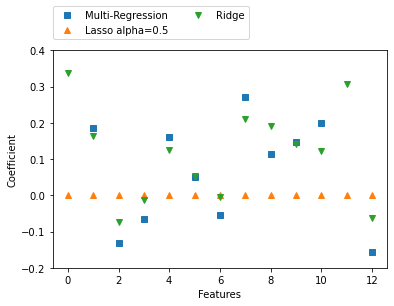

In [75]:
plt.plot(model.coef_, 's', label="Multi-Regression")
plt.plot(lasso.coef_, '^', label="Lasso alpha=0.5")
plt.plot(ridge.coef_, 'v', label="Ridge")

plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel("Features")
plt.ylabel("Coefficient")

# plt.hlines(0, 0, len(lr.coef_))

plt.ylim(-0.2, 0.4)
plt.show()

## 모델별 잔차 시각화

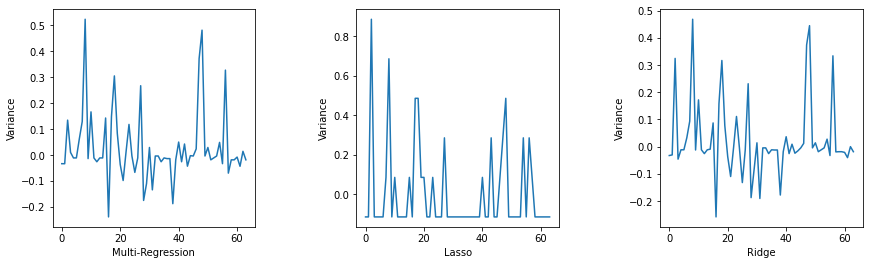

In [77]:
xx = range(64)
plt.subplot(1, 3, 1)
plt.plot(xx, residual, label='Multi-Regression_residual')
plt.xlabel('Multi-Regression')
plt.ylabel('Variance')

plt.subplot(1, 3, 2)
plt.plot(xx, lasso_residual, label='lasso_residual')
plt.xlabel('Lasso')
plt.ylabel('Variance')

plt.subplot(1, 3, 3)
plt.plot(xx, ridge_residual, label='ridge_residual')
plt.xlabel('Ridge')
plt.ylabel('Variance')

plt.subplots_adjust(wspace=0.5, right=2)
plt.show()

# 오버샘플링
## imblearn.over_sampling

In [79]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

In [95]:
# SMOTE
X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)

In [95]:
# ADASYN
X_train, y_train = ADASYN(random_state=42).fit_resample(X_train, y_train)

In [83]:
# 랜덤 오버 샘플링
X, y = RandomOverSampler(random_state=42).fit_resample(X, y)

## 선형회귀의 추정치로 데이터 생성

In [454]:
over_list = pd.DataFrame()

In [455]:
over_data = data.iloc[:, :]

In [456]:
over_data.columns.values

array(['TRAD', 'CONCERT', 'OLD', 'MART', 'LIB', 'ART', 'MUS', 'MED',
       'COMM', 'SPORT', 'CHARGE'], dtype=object)

In [457]:
model = LinearRegression()

In [458]:
# 독립변수를 종속변수 삼아 값 추정
for i in range(len(over_data.columns.values)):
    over_y = over_data.loc[:, f'{over_data.columns.values[i]}']
    over_X = over_data[over_data.columns.difference([f'{over_data.columns.values[i]}'])]

    over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, random_state=11, test_size=0.33)

    model.fit(over_X_train, over_y_train)

    y_pred = model.predict(over_X_test)

    over_list[f'{over_data.columns.values[i]}'] = pd.DataFrame(y_pred)

In [459]:
over_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TRAD     64 non-null     float64
 1   CONCERT  64 non-null     float64
 2   OLD      64 non-null     float64
 3   MART     64 non-null     float64
 4   LIB      64 non-null     float64
 5   ART      64 non-null     float64
 6   MUS      64 non-null     float64
 7   MED      64 non-null     float64
 8   COMM     64 non-null     float64
 9   SPORT    64 non-null     float64
 10  CHARGE   64 non-null     float64
dtypes: float64(11)
memory usage: 5.6 KB


In [460]:
over_X_result = over_list.iloc[:, :-1]
over_y_result = over_list.iloc[:, -1]

# 오버샘플링 결과 df 생성
merged_X = pd.concat([X, over_X_result], axis=0)
merged_y = pd.concat([y, over_y_result], axis=0)

In [210]:
X_train = merged_X
y_train = merged_y

In [465]:
X_train, X_test, y_train, y_test = train_test_split(merged_X, merged_y, test_size=0.33, random_state=42)

In [16]:
re_model = LinearRegression()
re_model.fit(X_train, y_train)
pred = re_model.predict(X_test)
residual = y_test - pred
print(f'훈련 데이터에 대한 정확도 : {re_model.score(X_train, y_train)}')
print(f'테스트 데이터에 대한 정확도 : {re_model.score(X_test, y_test)}')
print(f'회귀모델의 결정계수 : {re_model.score(merged_X, merged_y)}')
print(f'회귀모델의 잔차 평균 : {np.mean(residual)}')

훈련 데이터에 대한 정확도 : 0.6722062547571479
테스트 데이터에 대한 정확도 : 0.3657553044530649
회귀모델의 결정계수 : 0.5385313956817235
회귀모델의 잔차 평균 : 0.21195228850202788


In [17]:
print(f'X_train의 shape : {X_train.shape}')
print(f'X_test의 shape : {X_test.shape}')

X_train의 shape : (172, 10)
X_test의 shape : (85, 10)


# test <-> pred 비교 시각화

In [125]:
# os 에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else :
    font_family = "Apple Gothic"
    

# -값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

In [388]:
y_compare = {'y_test' : y_test, 'y_predicted' : y_pred}

In [389]:
y_compare = pd.DataFrame(y_compare)

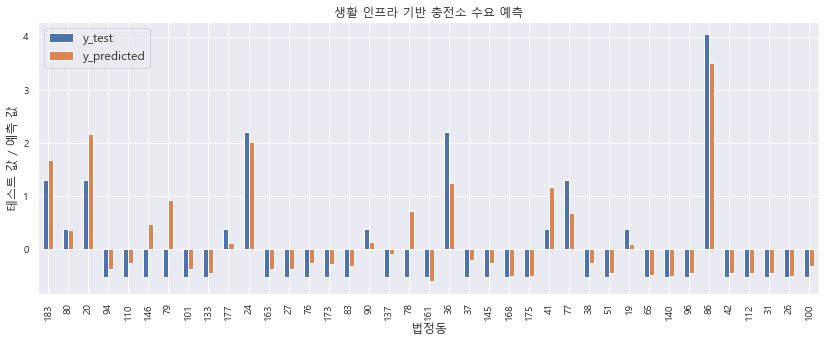

In [390]:
ax = y_compare.head(100).plot(kind = 'bar', title = '생활 인프라 기반 충전소 수요 예측', 
                   figsize = (14, 5), legend = True, fontsize = 10)
ax.set_xlabel('법정동', fontsize = 12)
ax.set_ylabel('테스트 값 / 예측 값', fontsize = 12)
ax.legend(['y_test', 'y_predicted'], fontsize = 12)

In [433]:
X_test = data[data['CHARGE'] <= 1].iloc[:,:-1]
X_test
ones = np.ones(X_test.shape[0])
ones = ones.astype('int64')
y_test = pd.DataFrame(ones, columns=['CHARGE'])

In [434]:
display(X_test, y_test)

,TRAD,CONCERT,OLD,MART,LIB,ART,MUS,MED,COMM,SPORT,OWN,JOB,CARROT
EMD_NM,,,,,,,,,,,,,
연제동,0,0,0,0,3,0,0,0,0,3,0,0,2
덕림동,0,0,1,0,0,0,0,0,0,1,0,0,0
삼거동,0,0,3,0,0,0,0,3,0,1,0,0,0
남동,0,0,0,0,1,0,0,0,0,0,0,0,0
북구_양산동,0,0,4,0,9,0,0,5,0,0,9,147,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
남구_용두동,0,0,2,0,0,0,0,0,0,3,0,0,0
광천동,0,0,1,1,3,0,0,4,1,2,3,93,3
내방동,0,0,0,0,1,0,0,0,0,1,0,0,0


,CHARGE
0,1
1,1
2,1
3,1
4,1
...,...
158,1
159,1
160,1
161,1


In [435]:
charge_zero_test_one = pd.concat([X_test.reset_index(), y_test], axis=1).set_index(['EMD_NM'])

In [436]:
X_test = charge_zero_train_one.iloc[:, :-1]
y_test = charge_zero_train_one.iloc[:, -1]

EMD_NM
연제동       1
덕림동       1
삼거동       1
남동        1
북구_양산동    1
         ..
남구_용두동    1
광천동       1
내방동       1
덕흥동       1
대의동       1
Name: CHARGE, Length: 163, dtype: int64